In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('./data/movies_data.csv')
# print(data.columns)
data = data[['EnMovieID','MovieName','ReleaseDate','GenreMain','Genre']]

In [8]:
layer = pd.read_csv('./data/layer_data.csv')
# display(layer)
layer = layer[['EntMovieID','Date','Attendance', 'AvgBoxOffice','ShowPercent']]
layer['date'] = layer['Date'].str[5:]

In [13]:
layer.duplicated(['EntMovieID','date'])
layer.drop_duplicates(['EntMovieID','date'], inplace=True)

In [29]:
_dd = []
for EntMovieID, _d in layer.groupby('EntMovieID'):
    _dd.append((_d.sort_values('Date').iloc[0:7]))
layer = pd.concat(_dd,axis=0)

In [32]:
movies = pd.merge(data,layer,how='left', left_on=['EnMovieID'], right_on=['EntMovieID'])

In [33]:
movies.shape

(621, 11)

In [34]:
events =  pd.read_csv('./data/events.csv')
hotTexts = pd.read_csv('./data/hotTexts.csv')
hotWords = pd.read_csv('./data/hotWords.csv')
media_rank = pd.read_csv('./data/media_rank.csv')
news_num = pd.read_csv('./data/news_num.csv')
weChart_num = pd.read_csv('./data/weChart_num.csv')

In [35]:
events = events.groupby('EnMovieID').count().max(axis=1)
# events.name='event'
# movies = pd.merge(movies, events, how='left', left_on='EnMovieID', right_index=True)

In [36]:
#微博热门话题
import re
def s_int(x):
    num = int(re.match('[0-9]*', x.strip(' ').strip("'")).group())
    res = re.findall(r'[\u4e00-\u9fa5]+', x.strip(' ').strip("'"))
    if (len(res)!=0):
        if res[0] == '万':
            num *=10000
        else:
            num *=1e8
    return num
            
hotTexts['ReadNum'] = hotTexts['ReadNum'].map(s_int)

In [37]:
hotTexts = hotTexts.groupby('EnMovieID')['ReadNum'].sum()
# hotTexts

In [38]:
hotWords = hotWords.groupby('EnMovieID')['HotNum'].sum()

In [39]:
media_rank = media_rank.groupby('EnMovieID')['Num'].sum()
news_num=news_num.groupby('EnMovieID')['Num'].sum()
weChart_num = weChart_num.groupby('EnMovieID')['Num'].sum()

In [40]:
names = ['events','hotTexts','hotWords','media_rank','news_num','weChart_num']
ds = [events,hotTexts,hotWords,media_rank,news_num,weChart_num]
for d,name in zip(ds,names):
    d.name=name
    movies = pd.merge(movies, d, how='left', left_on='EnMovieID', right_index=True)

In [41]:
del movies['EntMovieID']

In [42]:

movies['year'] = movies['Date'].map(lambda x: x.split('-')[0])

In [43]:
import datetime
gold_time = ['2012-01-23', '2013-02-10', '2014-01-31', '2015-01-19', '2016-02-08',
             '2017-01-28', '2018-02-16', '2019-02-05', '2020-01-25', '2021-02-12']

labor_day = [str(_) + '-05-01' for _ in range(2012, 2022)]
nation_day = [str(_) + '-10-01' for _ in range(2012, 2021)]
gold_time.extend(labor_day)
gold_time.extend(nation_day)
offset = datetime.timedelta(days=1)
_gold_time = {}
for t in gold_time:
    d = datetime.datetime.strptime(t, '%Y-%m-%d')
    for _ in range(7):
        _gold_time[d.strftime('%Y-%m-%d')] = _+1
        d += offset
len(_gold_time)

203

In [44]:
def parse_date(x):
    global _gold_time
    print(_gold_time[x])
movies['day'] = movies['Date'].map(lambda x: _gold_time[x])

In [46]:
movies.to_csv(r'C:\Users\28120\Desktop\新建文件夹\movies2.csv',index=False)

In [48]:
import pandas as pd 
import numpy as np

In [230]:
data = pd.read_csv(r'C:\Users\28120\Desktop\新建文件夹\处理后数据.csv')
data['评分（豆瓣）'] = data['评分（豆瓣）'].replace('暂无',np.nan)

In [231]:
data['评分（豆瓣）'] = data['评分（豆瓣）'].astype(float)
data['评分（豆瓣）'] = data['评分（豆瓣）'].fillna(data['评分（豆瓣）'].mean())

In [232]:
# data['EntMovieID'] = data['EntMovieID'].astype(int)
data = pd.merge(movies,data.drop_duplicates(['编号'])[['编号','评分（豆瓣）']],left_on='EnMovieID', right_on='编号')


In [233]:
data.fillna(0, inplace=True)
data.to_csv(r'C:\Users\28120\Desktop\新建文件夹\all.csv', index=False)

In [234]:
data = pd.read_csv(r'C:\Users\28120\Desktop\新建文件夹\all.csv')

In [235]:
group_data = data.groupby('编号')
_data = []
for k, v in group_data:
    vv = []
#     print(v['上映时间段'].iloc[0])
    _data.append([k, v['上映时间段'].iloc[0], v['影片类型'].iloc[0], v['平均票价'].mean(), v['上座率'].mean(),v['评分（豆瓣）'].mean(),
             v['events'].sum(),v['hotTexts'].sum(),v['hotWords'].sum(),v['media_rank'].sum(),v['news_num'].sum()
              ,v['weChart_num'].sum(),v['排片率'].mean()])

In [236]:
_data = pd.DataFrame(_data,columns=['no','release','type','price','seatRate','score','events','hotTexts','hotWords','media_rank','news_num','weChart_num','rate'])


In [237]:
_data = _data.set_index('no')

In [238]:
types = pd.get_dummies(_data['type'])

In [239]:
types

'剧情'   '动作'   '动画'   '喜剧'   '奇幻'   '惊悚'   '爱情'   '科幻'   '纪录片'
no                                                                    
346818      0      0      0      0      0      0      0      1       0
473370      0      0      0      1      0      0      0      0       0
589349      0      0      0      0      1      0      0      0       0
589797      0      0      0      0      1      0      0      0       0
590410      0      0      0      1      0      0      0      0       0
...       ...    ...    ...    ...    ...    ...    ...    ...     ...
696708      0      1      0      0      0      0      0      0       0
701620      0      0      0      1      0      0      0      0       0
701866      1      0      0      0      0      0      0      0       0
701898      1      0      0      0      0      0      0      0       0
702792      0      0      0      0      0      0      0      0       1

[87 rows x 9 columns]

In [240]:
types.columns=[f't{i}' for i in range(9)]

In [241]:
types

t0  t1  t2  t3  t4  t5  t6  t7  t8
no                                        
346818   0   0   0   0   0   0   0   1   0
473370   0   0   0   1   0   0   0   0   0
589349   0   0   0   0   1   0   0   0   0
589797   0   0   0   0   1   0   0   0   0
590410   0   0   0   1   0   0   0   0   0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..
696708   0   1   0   0   0   0   0   0   0
701620   0   0   0   1   0   0   0   0   0
701866   1   0   0   0   0   0   0   0   0
701898   1   0   0   0   0   0   0   0   0
702792   0   0   0   0   0   0   0   0   1

[87 rows x 9 columns]

In [242]:
avg_data = pd.merge(_data,types, on='no')
del avg_data['type']

In [243]:
columns = ['events','hotTexts','hotWords','media_rank','news_num','weChart_num']

def standard(e):
    minmal = e.min()
    offset = e.max()-e.min()
    return (e-minmal)/offset
mean = 0
for i in columns:
    mean += standard(avg_data[i])
mean = mean/len(columns)
mean.name = 'yinxiao'
avg_data = pd.merge(avg_data, mean, on='no')

In [244]:
avg_data

release      price   seatRate     score  events    hotTexts  \
no                                                                          
346818   '2013-05-01'  41.857143  30.607143  7.800000     0.0         0.0   
473370   '2013-02-10'  32.571429  14.788571  8.600000     0.0         0.0   
589349   '2014-01-31'  42.428571  36.758571  4.300000     0.0         0.0   
589797   '2013-02-10'  41.142857  37.028571  7.100000     0.0         0.0   
590410   '2012-01-23'  26.571429   7.651429  4.000000     0.0         0.0   
...               ...        ...        ...       ...     ...         ...   
696708   '2021-05-01'  38.428571  12.267143  5.200000    42.0    238000.0   
701620   '2020-10-01'  39.428571  33.654286  7.200000   112.0  68691000.0   
701866   '2021-02-12'  46.428571  26.952857  6.800000   119.0   2828000.0   
701898   '2021-05-01'  34.000000  14.704286  6.200000    84.0    811874.0   
702792   '2020-10-01'  39.142857  12.588571  5.598734    14.0    302820.0   

         hotWords  media_rank  news_num  weChart_num  ...  t0  t1  t2  t3  t4  \
no                                                    ...                       
346818        0.0         0.0       0.0          0.0  ...   0   0   0   0   0   
473370        0.0         0.0       0.0          0.0  ...   0   0   0   1   0   
589349   346052.0       350.0    1771.0          0.0  ...   0   0   0   0   1   
589797        0.0         0.0       0.0          0.0  ...   0   0   0   0   1   
590410        0.0         0.0       0.0          0.0  ...   0   0   0   1   0   
...           ...         ...       ...          ...  ...  ..  ..  ..  ..  ..   
696708   401191.0       700.0    1225.0     268037.0  ...   0   1   0   0   0   
701620  3368029.0      1183.0    4137.0     287434.0  ...   0   0   0   1   0   
701866  1959972.0      1785.0    4088.0    1158717.0  ...   1   0   0   0   0   
701898   446957.0       420.0     763.0     278754.0  ...   1   0   0   0   0   
702792    13209.0       203.0     497.0      42000.0  ...   0   0   0   0   0   

        t5  t6  t7  t8   yinxiao  
no                                
346818   0   0   1   0  0.000000  
473370   0   0   0   0  0.000000  
589349   0   0   0   0  0.021741  
589797   0   0   0   0  0.000000  
590410   0   0   0   0  0.000000  
...     ..  ..  ..  ..       ...  
696708   0   0   0   0  0.070323  
701620   0   0   0   0  0.152552  
701866   0   0   0   0  0.236297  
701898   0   0   0   0  0.076286  
702792   0   0   0   1  0.018005  

[87 rows x 21 columns]

In [245]:
avg_data.drop(columns=columns,inplace=True)

In [246]:
avg_data.to_csv(r'C:\Users\28120\Desktop\新建文件夹\avg_data4.csv')

In [247]:
avg_data = pd.read_csv(r'C:\Users\28120\Desktop\新建文件夹\avg_data4.csv')

In [249]:
avg_data[['price','rate','score','yinxiao','seatRate']].corr()

price      rate     score   yinxiao  seatRate
price     1.000000  0.464852  0.295610  0.678868  0.343400
rate      0.464852  1.000000  0.294066  0.295821  0.740068
score     0.295610  0.294066  1.000000  0.258340  0.350586
yinxiao   0.678868  0.295821  0.258340  1.000000  0.271638
seatRate  0.343400  0.740068  0.350586  0.271638  1.000000

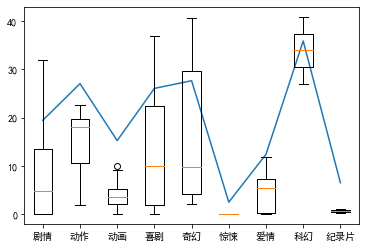

In [252]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
t = ['剧情','动作','动画','喜剧','奇幻','惊悚','爱情','科幻','纪录片']
_ = [avg_data[avg_data[f't{i}']==1]['rate'] for i in range(9)]
plt.plot(range(1,10),[avg_data[avg_data[f't{i}']==1]['seatRate'].mean() for i in range(9)])
plt.boxplot(_)
plt.xticks(range(1,10), t)
plt.show()


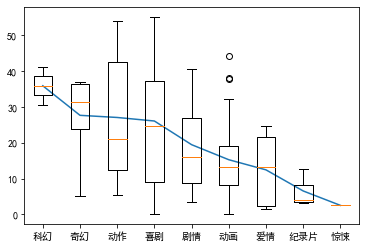

In [253]:
_ = {j:avg_data[avg_data[f't{i}']==1]['seatRate'] for i,j in zip(range(9),t)}
def ff(x):
    print(x)
_ = dict(sorted(_.items(), key=lambda x:x[1].mean(), reverse=True))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.plot(range(1,10),[_[i].mean() for i in _])
plt.boxplot(_.values())
plt.xticks(range(1,10), _.keys())
plt.show()


In [85]:
data_list = []
rates = []
for i in range(1,6):
    laber1 = pd.read_csv(f'E:\python\数据分析\可视化\data\layer{i}_data.csv')
    laber1['date'] = laber1['Date'].str[5:]
    laber1 = laber1.drop_duplicates(['date','EntMovieID'])    
    data_list.append(laber1)
    rates.append(laber1['Attendance'].mean())

Text(0, 0.5, '上座率')

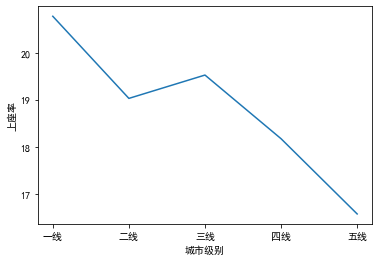

In [86]:
plt.plot(['一线','二线','三线','四线','五线'],rates)
plt.xlabel('城市级别')
plt.ylabel('上座率')

In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [255]:
X_train, X_test, y_train, y_test = train_test_split(avg_data[['price','rate','score','t0','t1','t2','t3','t4','t5','t6','t7','t8','yinxiao']],avg_data['seatRate'], test_size = 0.2)

t = RandomForestRegressor(n_estimators=30)
t.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [256]:
t.score(X_test, y_test)

0.36476010089620425

<BarContainer object of 13 artists>

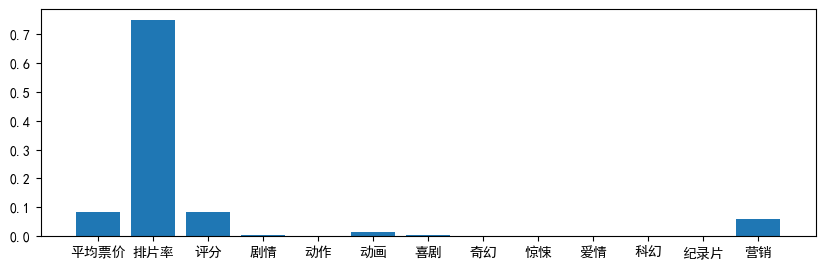

In [257]:
plt.figure(figsize=(10,3), dpi=100)
plt.bar(['平均票价','排片率','评分','剧情','动作','动画','喜剧','奇幻','惊悚','爱情','科幻','纪录片','营销'],t.feature_importances_)

In [258]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签


In [259]:
important = dict(zip(['平均票价','排片率','评分','剧情','动作','动画','喜剧','奇幻','惊悚','爱情','科幻','纪录片','营销'],t.feature_importances_))

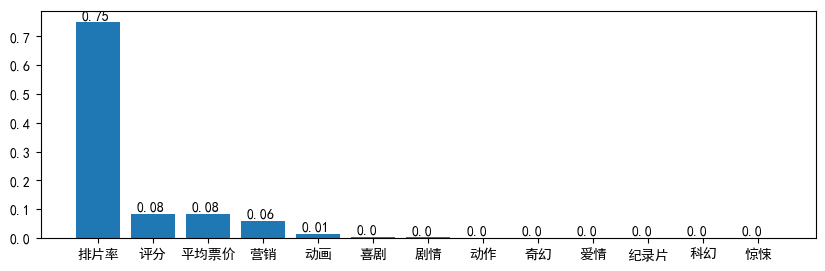

In [260]:
import math
plt.figure(figsize=(10,3), dpi=100)
important = dict(sorted(important.items(), key=lambda x: x[1], reverse=True))
plt.bar(important.keys(), important.values())
for i,v in enumerate(important.values()):
    plt.text(i-0.3,v+0.01, round(v,2))

<Figure size 300000x300000 with 0 Axes>

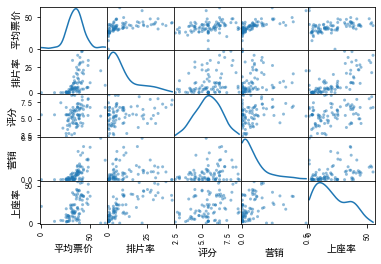

In [261]:
plt.figure(figsize=(1000,1000), dpi=300)
_ = avg_data[['price','rate','score','yinxiao','seatRate']]
_.columns = ['平均票价','排片率','评分','营销','上座率']
pd.plotting.scatter_matrix(_, diagonal='kde')
plt.savefig(r'C:\Users\28120\Desktop\新建文件夹\1.jpg',quality=95,dpi=300)

In [277]:
avg_data['year'] = avg_data['release'].str[2:6]

In [278]:
year_data = avg_data.groupby('year')[['price','seatRate','score','rate','yinxiao']].mean()

In [280]:
year_data

price   seatRate     score       rate   yinxiao
year                                                     
2012  29.107143  18.843929  5.500000   4.323214  0.000000
2013  31.107143  17.498036  6.187342  11.852321  0.000000
2014  33.230769  21.287143  5.930769  10.136374  0.053901
2015  23.892857   7.041250  4.424842   0.704107  0.011160
2016  32.666667  28.966905  5.333122  15.025238  0.057287
2017  33.085714  22.411429  5.289620  10.194143  0.041864
2018  37.222222  33.754603  5.411111  12.280000  0.109001
2019  38.214286  21.326310  5.658228   9.697262  0.132772
2020  47.952381  15.423810  6.499578  14.383810  0.133584
2021  42.224490  16.591224  5.864286   9.084898  0.162838

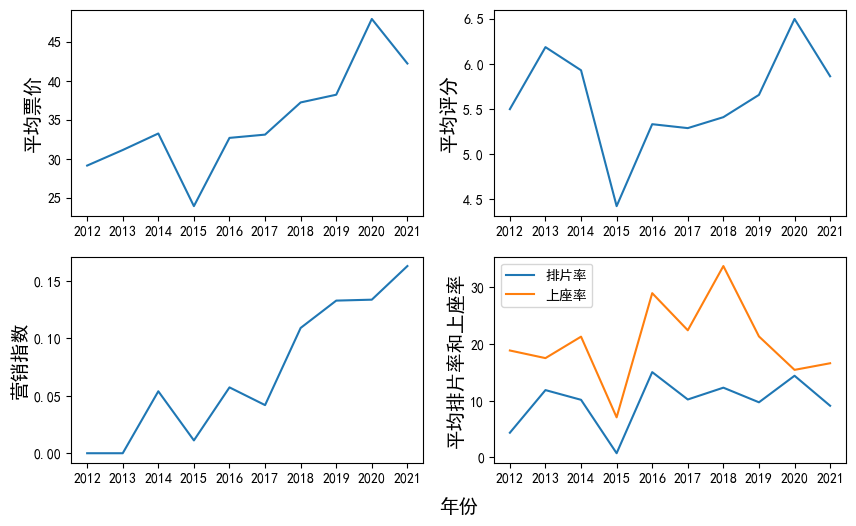

In [290]:
plt.figure(figsize=(10,6),dpi=100)
plt.subplot(2,2,1)
plt.plot(year_data['price'])
plt.ylabel('平均票价', fontsize=14)
plt.subplot(2,2,2)
plt.plot(year_data['score'])
plt.ylabel('平均评分', fontsize=14)
plt.subplot(2,2,3)
plt.plot(year_data['yinxiao'])
plt.ylabel('营销指数', fontsize=14)
plt.subplot(2,2,4)
plt.plot(year_data['rate'])
plt.plot(year_data['seatRate'])
legend = plt.legend(['排片率', '上座率'], loc='upper left', facecolor=None)
plt.ylabel('平均排片率和上座率', fontsize=14)
plt.text(x=-2, y=-10, s='年份', fontsize=14)
plt.show()

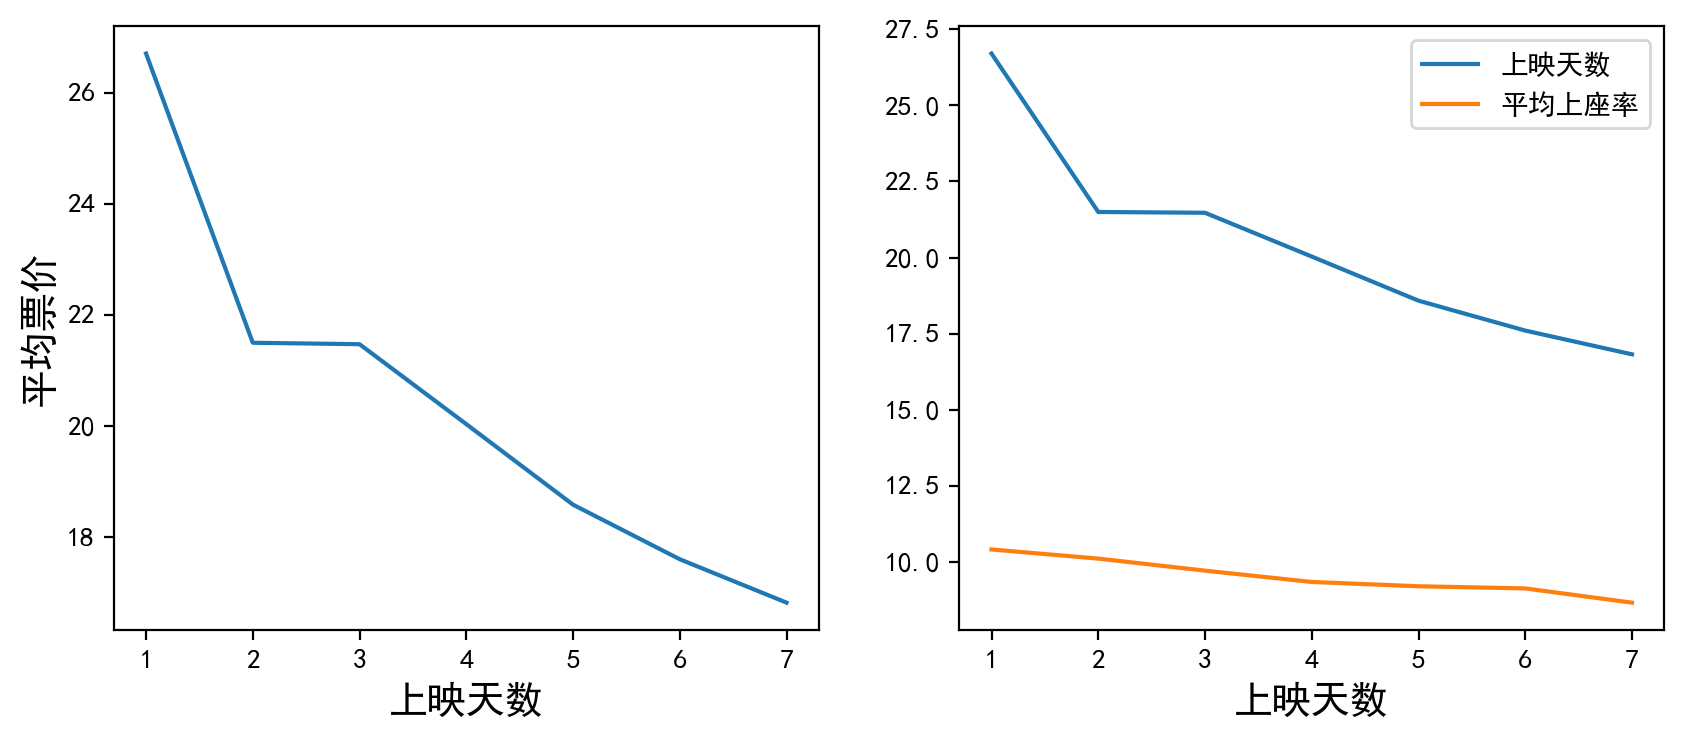

<Figure size 1000x1800 with 0 Axes>

In [288]:
plt.figure(figsize=(10,4), dpi=200)
plt.subplot(1,2,1)
plt.plot(movies.groupby('day')['Attendance'].mean())
plt.xlabel('上映天数', fontsize=14)
plt.ylabel('平均票价', fontsize=14)
plt.subplot(1,2,2)
plt.plot(movies.groupby('day')['Attendance'].mean())
plt.plot(movies.groupby('day')['ShowPercent'].mean())
plt.xlabel('上映天数', fontsize=14)
plt.legend(['上映天数','平均上座率'])
plt.figure(figsize=(10,18),dpi=100)
plt.show()

In [228]:
movies.groupby('day')[['Attendance','ShowPercent']].mean()

Attendance  ShowPercent
day                         
1     26.704944    10.402472
2     21.496854    10.101910
3     21.470787     9.705730
4     20.031461     9.333708
5     18.580787     9.192697
6     17.598068     9.121705
7     16.816818     8.653864

In [227]:
movies

EnMovieID  MovieName    ReleaseDate GenreMain        Genre        Date  \
0       594661    '新天生一对'   '2012-01-23'      '爱情'   '爱情/喜剧/亲情'  2012-01-23   
1       594661    '新天生一对'   '2012-01-23'      '爱情'   '爱情/喜剧/亲情'  2012-01-24   
2       594661    '新天生一对'   '2012-01-23'      '爱情'   '爱情/喜剧/亲情'  2012-01-25   
3       594661    '新天生一对'   '2012-01-23'      '爱情'   '爱情/喜剧/亲情'  2012-01-26   
4       594661    '新天生一对'   '2012-01-23'      '爱情'   '爱情/喜剧/亲情'  2012-01-27   
..         ...        ...            ...       ...          ...         ...   
616     701620   '我和我的家乡'   '2020-10-01'      '喜剧'      '喜剧/剧情'  2020-10-03   
617     701620   '我和我的家乡'   '2020-10-01'      '喜剧'      '喜剧/剧情'  2020-10-04   
618     701620   '我和我的家乡'   '2020-10-01'      '喜剧'      '喜剧/剧情'  2020-10-05   
619     701620   '我和我的家乡'   '2020-10-01'      '喜剧'      '喜剧/剧情'  2020-10-06   
620     701620   '我和我的家乡'   '2020-10-01'      '喜剧'      '喜剧/剧情'  2020-10-07   

     Attendance  AvgBoxOffice  ShowPercent   date  events   hotTexts  \
0         25.32          34.0         9.46  01-23     NaN        NaN   
1         24.28          32.0         9.74  01-24     NaN        NaN   
2         25.42          32.0        10.10  01-25     NaN        NaN   
3         24.49          33.0         9.66  01-26     NaN        NaN   
4         23.49          33.0         9.72  01-27     NaN        NaN   
..          ...           ...          ...    ...     ...        ...   
616       40.28          39.0        32.95  10-03    16.0  9813000.0   
617       34.75          40.0        32.73  10-04    16.0  9813000.0   
618       29.45          39.0        35.73  10-05    16.0  9813000.0   
619       26.44          39.0        38.14  10-06    16.0  9813000.0   
620       24.74          39.0        38.61  10-07    16.0  9813000.0   

     hotWords  media_rank  news_num  weChart_num  year  day  
0         NaN         NaN       NaN          NaN  2012    1  
1         NaN         NaN       NaN          NaN  2012    2  
2         NaN         NaN       NaN          NaN  2012    3  
3         NaN         NaN       NaN          NaN  2012    4  
4         NaN         NaN       NaN          NaN  2012    5  
..        ...         ...       ...          ...   ...  ...  
616  481147.0       169.0     591.0      41062.0  2020    3  
617  481147.0       169.0     591.0      41062.0  2020    4  
618  481147.0       169.0     591.0      41062.0  2020    5  
619  481147.0       169.0     591.0      41062.0  2020    6  
620  481147.0       169.0     591.0      41062.0  2020    7  

[621 rows x 18 columns]